In [2]:
import tensorflow as tf
import keras 
from keras import layers , models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "humanpose",
    shuffle = True ,
    image_size = (512 , 512),
    batch_size = 32
    
)
len(dataset)

Found 4766 files belonging to 4 classes.


149

In [4]:
class_names = dataset.class_names
class_names

['bending', 'lie down', 'sitting', 'standing']

In [5]:
def dataset_partition (ds , train_split=0.8 , valid_split=0.1 , test_split=0.1 , shuffle=True , shuffle_size=10000 ):
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size , seed=12)
    
    
    train_size = int(train_split * ds_size)
    val_size = int(valid_split * ds_size)

    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    
    
    return train_ds , val_ds , test_ds
    
    


In [6]:
train_ds , val_ds , test_ds = dataset_partition(dataset)
len(train_ds) , len(val_ds) , len(test_ds)

(119, 14, 16)

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256 , 256) ,
    layers.experimental.preprocessing.Rescaling(1.0/255) 
])

In [14]:
model = models.Sequential([
    resize_and_rescale ,
    layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(32,256,256,3)) ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64 , kernel_size= (3,3) , activation='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64 , kernel_size= (3,3) , activation='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64 , (3,3) , activation='relu') ,
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu') ,
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu') ,
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(4 , activation='softmax'),

])

model.build(input_shape=(32,256,256,3))


In [15]:
model.compile(
    optimizer='adam' ,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
model.fit(
    train_ds , 
    epochs=10 , 
    batch_size=32 , 
    verbose=1 , 
    validation_data=val_ds



)

Epoch 1/10


119/119 [==============================] - 164s 1s/step - loss: 0.6479 - accuracy: 0.7525 - val_loss: 0.2350 - val_accuracy: 0.9260
Epoch 2/10
119/119 [==============================] - 121s 1s/step - loss: 0.3295 - accuracy: 0.8896 - val_loss: 0.1463 - val_accuracy: 0.9574
Epoch 3/10
119/119 [==============================] - 105s 881ms/step - loss: 0.2467 - accuracy: 0.9170 - val_loss: 0.1264 - val_accuracy: 0.9664
Epoch 4/10
119/119 [==============================] - 111s 932ms/step - loss: 0.1760 - accuracy: 0.9417 - val_loss: 0.0903 - val_accuracy: 0.9731
Epoch 5/10
119/119 [==============================] - 109s 916ms/step - loss: 0.1405 - accuracy: 0.9496 - val_loss: 0.0801 - val_accuracy: 0.9753
Epoch 6/10
119/119 [==============================] - 106s 888ms/step - loss: 0.1164 - accuracy: 0.9616 - val_loss: 0.0735 - val_accuracy: 0.9753
Epoch 7/10
119/119 [==============================] - 110s 921ms/step - loss: 0.0682 - accuracy: 0.9764 - val_loss: 0.0742 - val

In [17]:
scores = model.evaluate(test_ds)

16/16 [==============================] - 5s 322ms/step - loss: 0.1384 - accuracy: 0.9570


In [18]:
def predict(model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array , 0)
    
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    
    return predicted_class

1/1 [==============================] - 0s 33ms/step


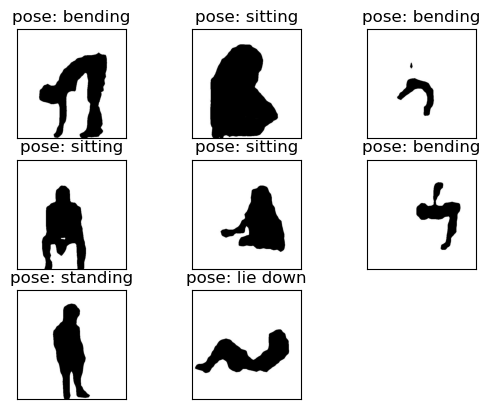

In [21]:
for images , labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3 ,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class = predict(model , images[i].numpy())
        plt.title(f"pose: {predicted_class}")
        
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [22]:
model_version = 5
model.save(f"model/{model_version}")

INFO:tensorflow:Assets written to: model/5\assets


INFO:tensorflow:Assets written to: model/5\assets
